In [2]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean

In [3]:

import pandas as pd
law=pd.read_csv(r'C:\Users\sgoethals\Dropbox\PC (2)\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\Data\law_school_clean.csv', sep=',')
X=law.drop(columns=[ 'pass_bar'])
y = law.loc[:, 'pass_bar']
X['race']=[1 if X.loc[i,'race']=='Non-White' else 0 for i in range(len(X))]
good_outcome=1
bad_outcome=0
sens_var='race'
sensitive_value=1
y.value_counts(normalize=True)

1.0    0.889749
0.0    0.110251
Name: pass_bar, dtype: float64

In [5]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\clean_functions.py"

In [6]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.8607636554598072
The AUC of the biased model (test set) is: 0.8705813174134217
The AUC of the biased model for the protected group (validation set) is: 0.7993420572213055
The AUC of the biased model for the privileged group (validation set) is: 0.8480960312694857
The AUC of the biased model for the protected group (test set) is: 0.8415241489097574
The AUC of the biased model for the privileged group (test set) is: 0.8523098524072565
Calculate demographic parity


100%|██████████| 100/100 [01:06<00:00,  1.49it/s]


Calculate equality of opportunity


100%|██████████| 100/100 [1:21:44<00:00, 49.05s/it]


Calculate precision


100%|██████████| 100/100 [00:02<00:00, 46.87it/s]


Calculate recall


100%|██████████| 100/100 [00:01<00:00, 58.51it/s]


In [7]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.15903846153846155
Percentage of people with the target value 0.8898076923076923
The base rate disparity is 0.1982399416447691


In [8]:
#base rate disparity
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))

The base rate disparity is 0.1982399416447691
The average cost of fairness (DP) is 0.006149825196940919
The average cost of fairness (EO) is 0.003967575394992118


In [12]:
# save results
import pickle

with open(f'Results/Law_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Law_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

In [9]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\visualisations.py"

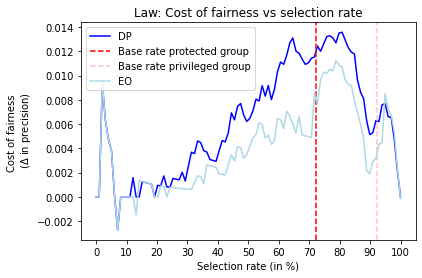

In [10]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Law'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')   

In [13]:
test_metrics['prec_unfair']

[1.0,
 0.9811320754716981,
 0.9905660377358491,
 0.9873417721518988,
 0.985781990521327,
 0.9885931558935361,
 0.9873417721518988,
 0.9864130434782609,
 0.9881235154394299,
 0.9894291754756871,
 0.9904942965779467,
 0.9913494809688581,
 0.9920760697305864,
 0.9912152269399708,
 0.9918478260869565,
 0.9923857868020305,
 0.9928656361474435,
 0.9932810750279956,
 0.9936575052854123,
 0.9929859719438878,
 0.9933396764985728,
 0.9936536718041704,
 0.9939446366782007,
 0.9933774834437086,
 0.9936558287073751,
 0.993907083015994,
 0.9934114202049781,
 0.9936530324400564,
 0.9938817131203264,
 0.9934340118187788,
 0.993020304568528,
 0.9932432432432432,
 0.9934562760261749,
 0.9936562860438293,
 0.9932810750279956,
 0.9929309407286568,
 0.9925965097831835,
 0.9922839506172839,
 0.9919839679358717,
 0.9912152269399708,
 0.9909566872917658,
 0.9907149489322191,
 0.9904805077062556,
 0.9907038512616202,
 0.9909130246646474,
 0.9898477157360406,
 0.9896523178807947,
 0.9890643985419199,
 0.9884966

In [15]:
test_metrics['prec_eo']

[1,
 0.9811320754716981,
 0.9811320754716981,
 0.9810126582278481,
 0.981042654028436,
 0.9847908745247148,
 0.9873417721518988,
 0.9891304347826086,
 0.9881235154394299,
 0.9894291754756871,
 0.9904942965779467,
 0.9913494809688581,
 0.9920760697305864,
 0.9926793557833089,
 0.9904891304347826,
 0.9911167512690355,
 0.9916765755053508,
 0.9921612541993281,
 0.992600422832981,
 0.9929859719438878,
 0.9933396764985728,
 0.9927470534904805,
 0.9930795847750865,
 0.9933774834437086,
 0.992862807295797,
 0.9931454683929931,
 0.9926793557833089,
 0.9929478138222849,
 0.9932019034670292,
 0.9927774130006566,
 0.9923857868020305,
 0.9926289926289926,
 0.992266508030934,
 0.9919261822376009,
 0.9916013437849944,
 0.9918433931484503,
 0.9899524061343205,
 0.9897119341563786,
 0.9894789579158316,
 0.9887750122010737,
 0.9890528319847691,
 0.9888579387186629,
 0.9886672710788758,
 0.9880478087649402,
 0.9874513197749892,
 0.9868866328257191,
 0.9855132450331126,
 0.9850141757796679,
 0.9853232844